In [24]:
from poke_battle_logger.batch.extractor import Extractor
from poke_battle_logger.batch.frame_compressor import (
    frame_compress,
    message_frame_compress,
)
from poke_battle_logger.batch.frame_detector import FrameDetector
from poke_battle_logger.batch.pokemon_extractor import PokemonExtractor
from poke_battle_logger.database.database_handler import DatabaseHandler
import cv2
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [12]:
import os
os.environ["TESSDATA_PREFIX"] = "/opt/brew/Cellar/tesseract/5.3.0_1/share/tessdata_best/"

In [2]:
video_id = "lDBy_gcxFeA"
language = "en"
trainer_id_in_DB = 1

In [9]:
video = cv2.VideoCapture(f"video/{video_id}.mp4")
frame_detector = FrameDetector(language)
extractor = Extractor(language)
pokemon_extractor = PokemonExtractor()
database_handler = DatabaseHandler()

first_ranking_frames = []
select_done_frames = []
standing_by_frames = []
level_50_frames = []
ranking_frames = []
win_or_lost_frames = []
message_window_frames = []

total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
for i in tqdm(range(total_frames)):
    ret, frame = video.read()
    if ret:
        # first ranking
        if frame_detector.is_first_ranking_frame(frame):
            first_ranking_frames.append(i)

        # select done
        if frame_detector.is_select_done_frame(frame):
            select_done_frames.append(i)

        # standing_by
        if frame_detector.is_standing_by_frame(frame):
            standing_by_frames.append(i)

        # level_50
        if frame_detector.is_level_50_frame(frame):
            level_50_frames.append(i)

        # ranking
        if frame_detector.is_ranking_frame(frame):
            ranking_frames.append(i)

        # win_or_lost
        if frame_detector.is_win_or_lost_frame(frame):
            win_or_lost_frames.append(i)

        # message window
        if frame_detector.is_message_window_frame(frame):
            message_window_frames.append(i)
    else:
        continue

/Users/yusuke-fukasawa/Library/Caches/pypoetry/virtualenvs/poke-battle-logger-xYV7PrtE-py3.10/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


  0%|          | 0/73426 [00:00<?, ?it/s]

In [27]:
standing_by_frames

[3442,
 3443,
 3444,
 3445,
 3446,
 3447,
 3448,
 3449,
 3450,
 3451,
 3452,
 3453,
 3454,
 3455,
 3456,
 3457,
 3458,
 3459,
 3460,
 3461,
 3462,
 3463,
 3464,
 3465,
 3466,
 3467,
 3468,
 3469,
 3470,
 3471,
 3472,
 3473,
 3474,
 3475,
 3476,
 3477,
 3478,
 3479,
 3480,
 3481,
 3482,
 3483,
 3484,
 3485,
 3486,
 3487,
 3488,
 3489,
 3490,
 3491,
 3492,
 3493,
 3494,
 3495,
 3496,
 3497,
 3498,
 3499,
 3500,
 3501,
 3502,
 3503,
 21030,
 21031,
 21032,
 21033,
 21034,
 21035,
 21036,
 21037,
 21038,
 21039,
 21040,
 21041,
 21042,
 21043,
 21044,
 21045,
 21046,
 21047,
 21048,
 21049,
 21050,
 21051,
 21052,
 21053,
 21054,
 21055,
 21056,
 21057,
 21058,
 21059,
 21060,
 21061,
 21062,
 21063,
 21064,
 21065,
 21066,
 21067,
 21068,
 21069,
 21070,
 21071,
 21072,
 21073,
 21074,
 21075,
 21076,
 21077,
 21078,
 21079,
 21080,
 21081,
 21082,
 21083,
 21084,
 21085,
 21086,
 21087,
 21088,
 21089,
 21090,
 47420,
 47421,
 47422,
 47423,
 47424,
 47425,
 47426,
 47427,
 47428,
 47429

In [10]:
compressed_first_ranking_frames = frame_compress(first_ranking_frames)
compressed_select_done_frames = frame_compress(select_done_frames)
compressed_standing_by_frames = frame_compress(
    standing_by_frames, ignore_short_frames=True
)
compressed_level_50_frames = frame_compress(level_50_frames)
compressed_ranking_frames = frame_compress(ranking_frames)
compressed_win_or_lost_frames = frame_compress(win_or_lost_frames)
compressed_message_window_frames = message_frame_compress(
    message_window_frames, frame_threshold=3
)

In [13]:
rank_numbers = {}
first_ranking_frame_number = compressed_first_ranking_frames[0][-5]
video.set(cv2.CAP_PROP_POS_FRAMES, first_ranking_frame_number - 1)
_, _first_ranking_frame = video.read()
rank_numbers[first_ranking_frame_number] = extractor.extract_first_rank_number(
    _first_ranking_frame
)

# ランクを検出(OCR)
for ranking_frame_numbers in compressed_ranking_frames:
    ranking_frame_number = ranking_frame_numbers[-5]
    video.set(cv2.CAP_PROP_POS_FRAMES, ranking_frame_number - 1)
    _, _ranking_frame = video.read()
    rank_numbers[ranking_frame_number] = extractor.extract_rank_number(
        _ranking_frame
    )

In [14]:
rank_numbers

{216: 13093, 18587: 15639, 44308: 19339, 61050: 22820, 72521: 18378}

In [15]:
rank_frames = list(rank_numbers.keys())
for i in range(len(rank_numbers) - 1):
    _ranking_frame_number = rank_frames[i]
    _next_ranking_frame_number = rank_frames[i + 1]

    if (
        rank_numbers[_ranking_frame_number]
        == rank_numbers[_next_ranking_frame_number]
    ):
        del rank_numbers[_ranking_frame_number]

In [16]:
rank_numbers

{216: 13093, 18587: 15639, 44308: 19339, 61050: 22820, 72521: 18378}

In [19]:
len(compressed_standing_by_frames)

5

In [22]:
[v[-1] for v in compressed_standing_by_frames]

[3503, 21090, 47481, 64146, 67116]

In [26]:
compressed_standing_by_frames[-1]

[67116]

In [17]:
battle_start_end_frame_numbers = []
rank_frames = list(rank_numbers.keys())
for i in range(len(compressed_standing_by_frames)):
    _standing_by_frames = compressed_standing_by_frames[i]
    _standing_by_frame_number = _standing_by_frames[-1]

    # チーム選択からの場合(最初の順位表示なし)
    if len(compressed_standing_by_frames) == len(rank_numbers):
        _ranking_frame = rank_frames[i]
    else:
        # バトルスタジアム入場(最初に表示された順位がある)からの場合
        _ranking_frame = rank_frames[i + 1]

    if _standing_by_frame_number < _ranking_frame:
        battle_start_end_frame_numbers.append((_standing_by_frame_number, _ranking_frame))

In [18]:
battle_start_end_frame_numbers

[(67116, 72521)]

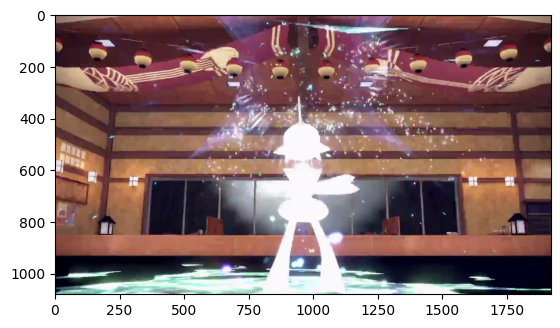

In [25]:
video.set(cv2.CAP_PROP_POS_FRAMES, 67116)
ret, frame = video.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)) # [500:600, 150:800]
plt.show()

In [34]:
def frame_compress2(
    target_frames,
    frame_threshold: int = 3,
    ignore_short_frames: bool = False,
):
    # フレームを連続区間で分割する
    compressed_frame_results = []
    temp = []
    for i in range(len(target_frames)):
        temp.append(target_frames[i])
        if (
            i < len(target_frames) - 1
            and target_frames[i + 1] - target_frames[i] > frame_threshold
        ):
            if ignore_short_frames:
                if len(temp) > 1:
                    compressed_frame_results.append(temp)
                else:
                    pass
            else:
                compressed_frame_results.append(temp)
            temp = []
    return compressed_frame_results

compressed_standing_by_frames = frame_compress2(
    standing_by_frames, ignore_short_frames=True
)

[[3442,
  3443,
  3444,
  3445,
  3446,
  3447,
  3448,
  3449,
  3450,
  3451,
  3452,
  3453,
  3454,
  3455,
  3456,
  3457,
  3458,
  3459,
  3460,
  3461,
  3462,
  3463,
  3464,
  3465,
  3466,
  3467,
  3468,
  3469,
  3470,
  3471,
  3472,
  3473,
  3474,
  3475,
  3476,
  3477,
  3478,
  3479,
  3480,
  3481,
  3482,
  3483,
  3484,
  3485,
  3486,
  3487,
  3488,
  3489,
  3490,
  3491,
  3492,
  3493,
  3494,
  3495,
  3496,
  3497,
  3498,
  3499,
  3500,
  3501,
  3502,
  3503],
 [21030,
  21031,
  21032,
  21033,
  21034,
  21035,
  21036,
  21037,
  21038,
  21039,
  21040,
  21041,
  21042,
  21043,
  21044,
  21045,
  21046,
  21047,
  21048,
  21049,
  21050,
  21051,
  21052,
  21053,
  21054,
  21055,
  21056,
  21057,
  21058,
  21059,
  21060,
  21061,
  21062,
  21063,
  21064,
  21065,
  21066,
  21067,
  21068,
  21069,
  21070,
  21071,
  21072,
  21073,
  21074,
  21075,
  21076,
  21077,
  21078,
  21079,
  21080,
  21081,
  21082,
  21083,
  21084,
  21085,